Develop a customer segmentation to strategize marketing campaigns

In [ ]:
# Importing libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
# I using Google Colab
import pandas as pd
from google.colab import files
uploaded = files.upload()

Saving Mall_Customers.csv to Mall_Customers.csv


In [ ]:
import io
df = pd.read_csv(io.BytesIO(uploaded['Mall_Customers.csv']))
# Dataset is now stored in a Pandas Dataframe

df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [ ]:
df.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [ ]:
df.isnull().sum().sum()
#see have any null values in the data frame

0

In [ ]:
df.shape

(200, 5)

Preprocessing

In [ ]:
EDA_df = df.copy()

EDA_df.drop('CustomerID', axis=1, inplace=True)

In [ ]:
#annual income and spending score is important data that are require
X = EDA_df.iloc[:, [2,3]].values
X

array([[ 15,  39],
       [ 15,  81],
       [ 16,   6],
       [ 16,  77],
       [ 17,  40],
       [ 17,  76],
       [ 18,   6],
       [ 18,  94],
       [ 19,   3],
       [ 19,  72],
       [ 19,  14],
       [ 19,  99],
       [ 20,  15],
       [ 20,  77],
       [ 20,  13],
       [ 20,  79],
       [ 21,  35],
       [ 21,  66],
       [ 23,  29],
       [ 23,  98],
       [ 24,  35],
       [ 24,  73],
       [ 25,   5],
       [ 25,  73],
       [ 28,  14],
       [ 28,  82],
       [ 28,  32],
       [ 28,  61],
       [ 29,  31],
       [ 29,  87],
       [ 30,   4],
       [ 30,  73],
       [ 33,   4],
       [ 33,  92],
       [ 33,  14],
       [ 33,  81],
       [ 34,  17],
       [ 34,  73],
       [ 37,  26],
       [ 37,  75],
       [ 38,  35],
       [ 38,  92],
       [ 39,  36],
       [ 39,  61],
       [ 39,  28],
       [ 39,  65],
       [ 40,  55],
       [ 40,  47],
       [ 40,  42],
       [ 40,  42],
       [ 42,  52],
       [ 42,  60],
       [ 43,

In [ ]:
# visuaizing the data with dendogram

import scipy.cluster.hierarchy as sch

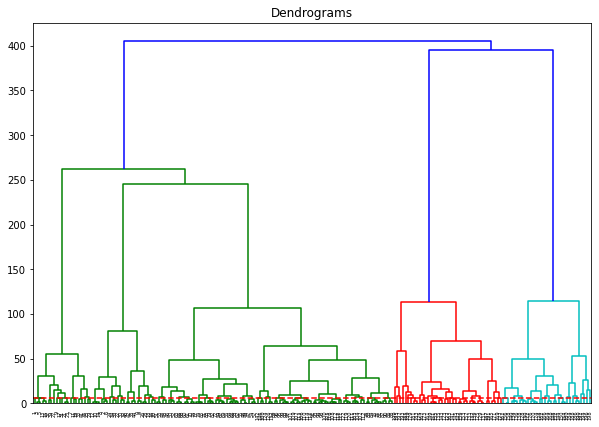

In [ ]:
# make a dendrogram using ward method 
plt.figure(figsize=(10, 7)) 
plt.title("Dendrograms") 
dendrogram = sch.dendrogram(sch.linkage(X, method = 'ward'))
plt.axhline(y=6, color='r', linestyle='--')

In [ ]:
# applying the hierarchical algorithm to the data

# import the agglomerative/hierarchical cluster from scikit learn 
from sklearn.cluster import AgglomerativeClustering

In [ ]:
# initialize the model
hc= AgglomerativeClustering(n_clusters = 5, affinity = 'euclidean', linkage = 'ward')

In [ ]:
# fit and predict 
y_hc = hc.fit_predict(X)
y_hc

array([4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3,
       4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 1,
       4, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 2, 1, 2, 0, 2, 0, 2,
       1, 2, 0, 2, 0, 2, 0, 2, 0, 2, 1, 2, 0, 2, 1, 2, 0, 2, 0, 2, 0, 2,
       0, 2, 0, 2, 0, 2, 1, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2])

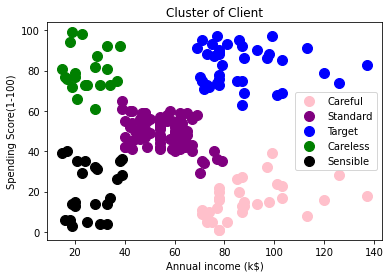

In [ ]:
# Visualizing the  Cluster
plt.scatter(X[y_hc == 0, 0], X[y_hc == 0, 1], s=100, c='pink', label = 'Careful')
plt.scatter(X[y_hc == 1, 0], X[y_hc == 1, 1], s=100, c='purple', label = 'Standard')
plt.scatter(X[y_hc == 2, 0], X[y_hc == 2, 1], s=100, c='blue', label = 'Target')
plt.scatter(X[y_hc == 3, 0], X[y_hc == 3, 1], s=100, c='green', label = 'Careless')
plt.scatter(X[y_hc == 4, 0], X[y_hc == 4, 1], s=100, c='black', label = 'Sensible')
plt.title('Cluster of Client')
plt.xlabel('Annual income (k$)')
plt.ylabel('Spending Score(1-100)')
plt.legend()
plt.show()

In [ ]:
from pandas import Series, DataFrame
EDA_df['cluster group'] = Series(y_hc, index=df.index)
EDA_df

,Gender,Age,Annual Income (k$),Spending Score (1-100),cluster group
0,Male,19,15,39,4
1,Male,21,15,81,3
2,Female,20,16,6,4
3,Female,23,16,77,3
4,Female,31,17,40,4
...,...,...,...,...,...
195,Female,35,120,79,2
196,Female,45,126,28,0
197,Male,32,126,74,2
198,Male,32,137,18,0


In [ ]:
# print number of instances in each cluster group
EDA_df['cluster group'].value_counts()

1    85
2    39
0    32
4    23
3    21
Name: cluster group, dtype: int64

In [ ]:
# Import our kmeans algorithm
from sklearn.cluster import KMeans
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler

In [ ]:
encoder = LabelEncoder()
EDA_df['Gender'] = encoder.fit_transform(df['Gender'])

gender_mappings = {index: label for index, label in enumerate(encoder.classes_)}
gender_mappings

{0: 0, 1: 1}

In [ ]:
EDA_df.iloc[:,[0,1,2,3,4]]

,Gender,Age,Annual Income (k$),Spending Score (1-100),cluster group
0,1,19,15,39,4
1,1,21,15,81,3
2,0,20,16,6,4
3,0,23,16,77,3
4,0,31,17,40,4
...,...,...,...,...,...
195,0,35,120,79,2
196,0,45,126,28,0
197,1,32,126,74,2
198,1,32,137,18,0


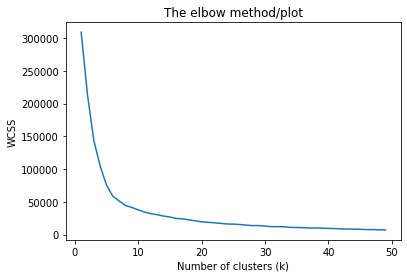

In [ ]:
##  Need to find the optimal k to use # Elbow Method
# The elbow method runs k-means clustering on the dataset for a range of values 
# for k (say from 1-50)and then for each value of k computes an average score 
# for all clusters.

# Convert our dataframe to a form which is usable by kmeans
x = EDA_df.iloc[:,[0,1,2,3,4]].values # loc

# Import our kmeans algorithm
from sklearn.cluster import KMeans

# WCSS - Plot the elbow plot    
# WCSS is the sum of squares of the distances of each data point in all 
# clusters to their respective centroids. The idea is to minimise the sum.
wcss = []

for i in range(1,50):
    kmeans = KMeans(n_clusters = i)
    kmeans.fit(x) # train the algorithm with the input data (x)
    wcss.append(kmeans.inertia_) # WCSS is also called inertia
    
# Plot the results on a line chart
# Allow us to observe the elbow
plt.plot(range(1,50), wcss)
plt.title('The elbow method/plot')
plt.xlabel('Number of clusters (k)')
plt.ylabel('WCSS')
plt.show()

In [ ]:
# We have decided on a k value = 5
kmeans = KMeans(n_clusters=5)
kmeans_model = kmeans.fit(x) # Training the model on input data

y_kmeans = kmeans_model.predict(x)

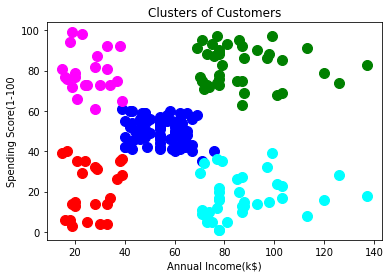

In [ ]:
#6 Visualising the clusters
plt.scatter(X[y_kmeans==0, 0], X[y_kmeans==0, 1], s=100, c='red', label ='Cluster 1')
plt.scatter(X[y_kmeans==1, 0], X[y_kmeans==1, 1], s=100, c='blue', label ='Cluster 2')
plt.scatter(X[y_kmeans==2, 0], X[y_kmeans==2, 1], s=100, c='green', label ='Cluster 3')
plt.scatter(X[y_kmeans==3, 0], X[y_kmeans==3, 1], s=100, c='cyan', label ='Cluster 4')
plt.scatter(X[y_kmeans==4, 0], X[y_kmeans==4, 1], s=100, c='magenta', label ='Cluster 5')


plt.title('Clusters of Customers')
plt.xlabel('Annual Income(k$)')
plt.ylabel('Spending Score(1-100')
plt.show()